In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

In [11]:
filepath = "/Users/emiliodulay/Documents/Programming/Student Success Classification/student-success/data/top5_counties_feature.csv"
df = pd.read_csv(filepath)

In [12]:
df.head()

,CountyCode,DistrictCode,SchoolCode,CountyName,CharterYN,Enrollment Total,Expulsions Total,Unduplicated Expulsion Total,Unduplicated Defiance,Expulsion Rate (Total),...,Multple,Native American,Non-Binary,Not Reported,Pacific Islander,Socioecon Disad,White,is_county,is_district,is_school
0,19,NaN,NaN,Los Angeles,NaN,654689.0,96.0,96.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,19,NaN,NaN,Los Angeles,NaN,695578.0,212.0,212.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,19,NaN,NaN,Los Angeles,NaN,859.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,19,NaN,NaN,Los Angeles,NaN,107790.0,4.0,4.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,19,NaN,NaN,Los Angeles,NaN,94686.0,73.0,73.0,0.0,0.1,...,0,0,0,0,0,0,0,1,0,0


In [15]:
X = df.drop(["CountyName", "CountyCode"], axis = 1) # Features
y = df["CountyName"]  # Labels

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Base model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
print("Test Accuracy:", best_model.score(X_test, y_test))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Accuracy: 0.9802936523946494
Test Accuracy: 0.9839152833428735


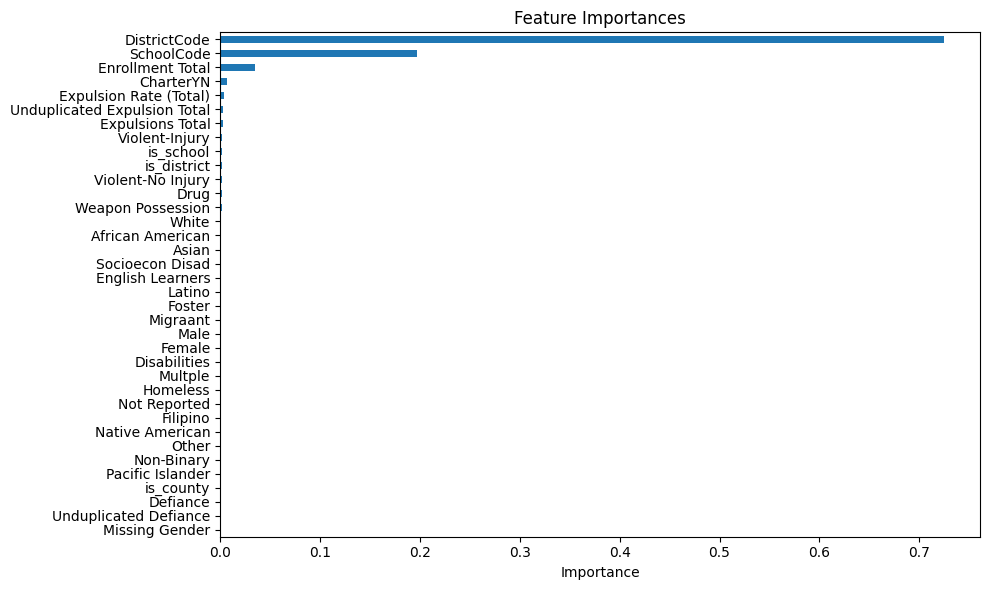

In [16]:
# Feature importance
importances = best_model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()